LOADING DATA

In [23]:
import pandas as pd
import os
import numpy as np

script_dir = os.getcwd()  
parent_dir = os.path.dirname(script_dir)  


transactions_dir = os.path.join(parent_dir, "dataset", "transactions")


csv_path = os.path.join(transactions_dir, "transactions.csv")

df = pd.read_csv(csv_path)




In [10]:
print("Shape Of Data:", df.shape)

Shape Of Data: (8010, 5)


In [11]:
df.head()

,amount,bin,device_id,geo,label
0,438.450148,123456,device_554,"(25.104065865001626, 66.95921304140683)",0.0
1,178.152618,111111,device_6780,"(25.037533769731382, 66.9607476689058)",0.0
2,374.443790,111111,device_3101,"(25.131175294991905, 67.05840662365058)",0.0
3,103.388384,654321,device_7048,"(25.00245185568905, 67.05504993224076)",0.0
4,256.053440,111111,device_2605,"(25.03590870114692, 67.00224039599291)",0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   amount     8010 non-null   float64
 1   bin        8010 non-null   int64  
 2   device_id  8010 non-null   object 
 3   geo        8010 non-null   object 
 4   label      8010 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 313.0+ KB



Class distribution:
label
0.0    8000
1.0      10
Name: count, dtype: int64


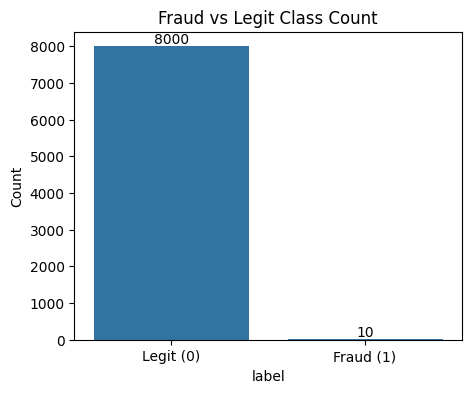

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nClass distribution:")
class_counts = df['label'].value_counts()
print(class_counts)

plt.figure(figsize=(5, 4))
ax = sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Fraud vs Legit Class Count")
plt.xticks([0, 1], ["Legit (0)", "Fraud (1)"])
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color="black")
plt.show()

In [ ]:
As mentioned in assignment the class imbalance is according to it 8000 legit and 10 fraud case 

In [15]:
print("5 BINs:\n", df["bin"].value_counts().head())


5 BINs:
 bin
654321    2707
123456    2655
111111    2648
Name: count, dtype: int64



 Correlation matrix:
          amount       bin     label
amount  1.000000  0.000785  0.077036
bin     0.000785  1.000000  0.019582
label   0.077036  0.019582  1.000000


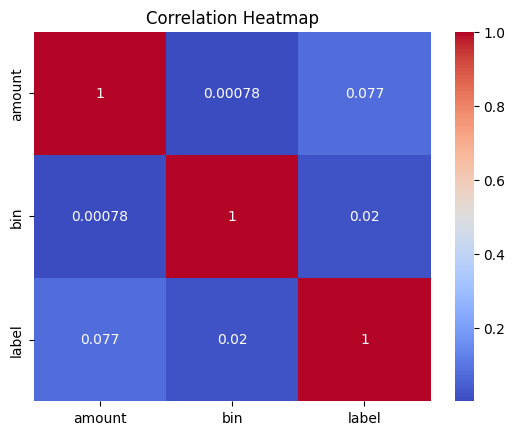

In [18]:
print("\n Correlation matrix:")
print(df[["amount", "bin", "label"]].corr())
sns.heatmap(df[["amount", "bin", "label"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
Co Relation Matrix showing bin have low signal for detcing and amount have high

In [30]:
#  Split legit and fraud transactions
legit_amounts = df[df["label"] == 0]["amount"]
fraud_amounts = df[df["label"] == 1]["amount"]

#  Print summary statistics
print("Legit Transaction Amounts:")
print(legit_amounts.describe())
print("\nFraud Transaction Amounts:")
print(fraud_amounts.describe())



Legit Transaction Amounts:
count    8000.000000
mean      247.899206
std       144.207477
min         1.005806
25%       122.427911
50%       247.010202
75%       371.873328
max       499.859119
Name: amount, dtype: float64

Fraud Transaction Amounts:
count     10.000000
mean     563.489290
std      174.754925
min      308.448543
25%      410.948266
50%      585.630034
75%      677.758907
max      831.830867
Name: amount, dtype: float64


Fraud have high mean indicating high amount than usual wereused in transaction



Fraud devices used multiple times:

device_id
fraud_device_2    2
fraud_device_0    2
fraud_device_1    2
Name: count, dtype: int64


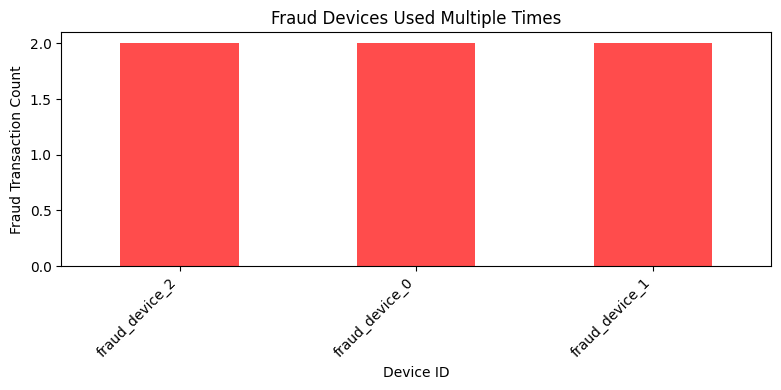

In [ ]:
#  Count device usage for fraud transactions only
fraud_devices = df[df["label"] == 1]["device_id"].value_counts()

#  Filter for devices used more than once
fraud_reused = fraud_devices[fraud_devices > 1]

#  Print repeated fraud devices
if not fraud_reused.empty:
    print("\nFraud devices used multiple times:\n")
    print(fraud_reused)

    #  Visualize with bar chart
    plt.figure(figsize=(8, 4))
    fraud_reused.sort_values(ascending=False).plot(
        kind="bar", color="red", alpha=0.7
    )
    plt.xlabel("Device ID")
    plt.ylabel("Fraud Transaction Count")
    plt.title("Fraud Devices Used Multiple Times")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("\nNo fraud devices used more than once.")

In [ ]:
In fraud case multiple account are used via same fraud device